In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.csv' , encoding="latin1")

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score , confusion_matrix , recall_score , precision_score
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2896,ham,ÌÏ collecting ur laptop then going to configur...,NaN,NaN,NaN
293,ham,Are you this much buzy,NaN,NaN,NaN
1304,ham,Your right! I'll make the appointment right now.,NaN,NaN,NaN
3755,ham,Yes:)here tv is always available in work place..,NaN,NaN,NaN
5131,ham,That sucks. I'll go over so u can do my hair. ...,NaN,NaN,NaN


In [5]:
# 1 . data cleaning
# 2. EDA
# 3. Text preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvemnt
# 7. website
# 8. Deploy

### Data cleaning

In [6]:
# Data cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last three column

df.drop(columns= ['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , inplace = True)

In [8]:
df.sample(5)

,v1,v2
803,spam,You have won a guaranteed å£200 award or even ...
5126,ham,"To the wonderful Okors, have a great month. We..."
2465,ham,S.i think he is waste for rr..
208,ham,You please give us connection today itself bef...
1775,ham,Did u see what I posted on your Facebook?


In [9]:
# rename the cols

df.rename(columns= {'v1' : 'Target' , 'v2' : 'text'} , inplace = True)

df.sample(5)

,Target,text
3533,ham,Good evening! How are you?
3582,ham,I sent your maga that money yesterday oh.
2201,ham,A boy was late 2 home. His father: \POWER OF F...
5466,spam,http//tms. widelive.com/index. wml?id=820554ad...
661,ham,Then mum's repent how?


In [10]:
# encode the target column

encoder = LabelEncoder()

df['Target'] = encoder.fit_transform(df['Target'])

df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# check missing value 

df.isnull().sum()

Target    0
text      0
dtype: int64

In [12]:
# check duplicate value

df.duplicated().sum()

np.int64(403)

In [13]:
# drop duplicate value

df = df.drop_duplicates(keep = 'first')

df.duplicated().sum()

np.int64(0)

In [14]:
df.shape

(5169, 2)

###  2.  EDA

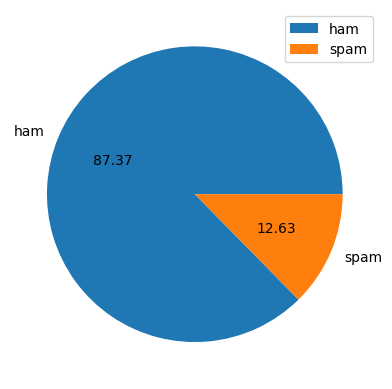

In [15]:
plt.pie(df['Target'].value_counts() , labels = ['ham' , 'spam'] , autopct = '%0.2f')
plt.legend()
plt.show()

In [16]:
# Data is imbalance

In [17]:
import nltk

In [18]:
df['num_character'] = df['text'].apply(len)

In [19]:
# break the basis of words

df['num_words'] = df['text'].apply(lambda x :len(nltk.word_tokenize(x)))

In [20]:
df.head()

,Target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
# break the basis of sentence

df['num_sentence'] = df['text'].apply(lambda x :len(nltk.sent_tokenize(x)))

df.sample(5)

,Target,text,num_character,num_words,num_sentence
3393,0,Bull. Your plan was to go floating off to IKEA...,129,31,3
3407,1,Do you want a New Nokia 3510i colour phone Del...,157,29,2
1947,0,The battery is for mr adewale my uncle. Aka Egbon,49,11,2
3120,0,Small problem in auction:)punj now asking tiwary,48,10,1
5350,0,No one interested. May be some business plan.,45,10,2


In [22]:
df[['num_character' , 'num_words' , 'num_sentence']].describe()

,num_character,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# describe for ham sms

df[df['Target'] == 0][['num_character' , 'num_words' , 'num_sentence']].describe()

,num_character,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# describe for spam sms

df[df['Target'] == 1][['num_character' , 'num_words' , 'num_sentence']].describe()

,num_character,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


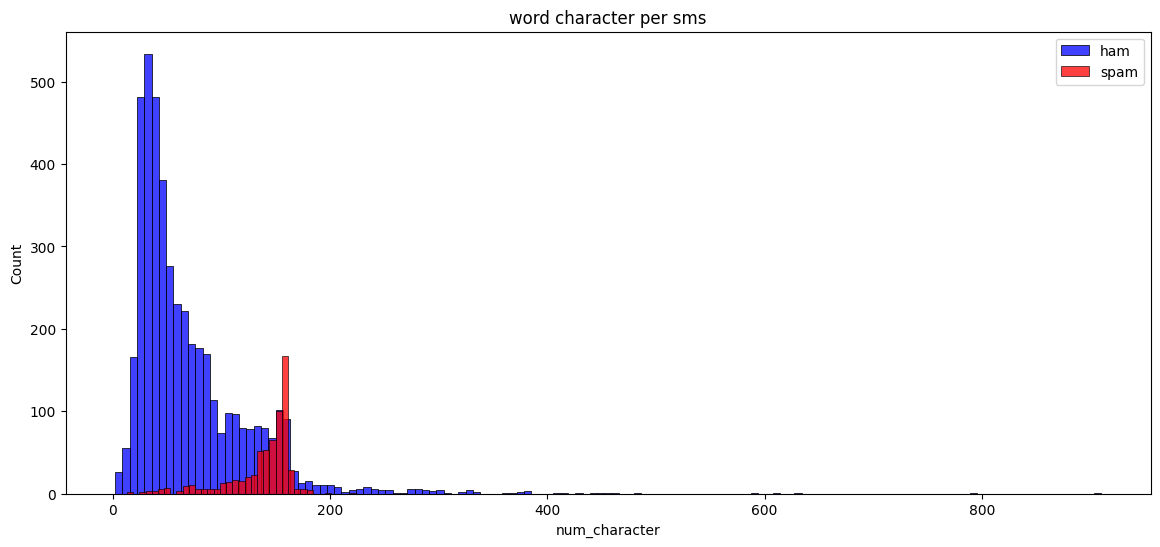

In [27]:
# plot the histogram for ham and spam

plt.figure(figsize = (14 ,6))
sns.histplot(df[df['Target'] == 0]['num_character'] , color = 'blue' , label = 'ham')
sns.histplot(df[df['Target'] == 1]['num_character'] , color = 'red' , label = 'spam')
plt.title('word character per sms')
plt.legend()
plt.show()

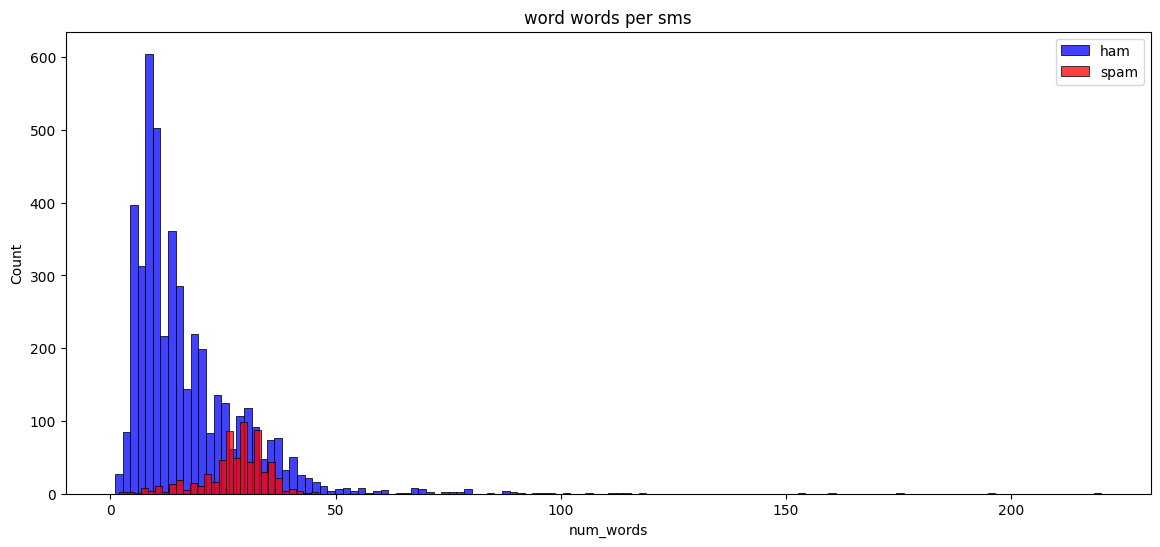

In [28]:
# plot the histogram for ham and spam

plt.figure(figsize = (14 ,6))
sns.histplot(df[df['Target'] == 0]['num_words'] , color = 'blue' , label = 'ham')
sns.histplot(df[df['Target'] == 1]['num_words'] , color = 'red' , label = 'spam')
plt.title('word words per sms')
plt.legend()
plt.show()

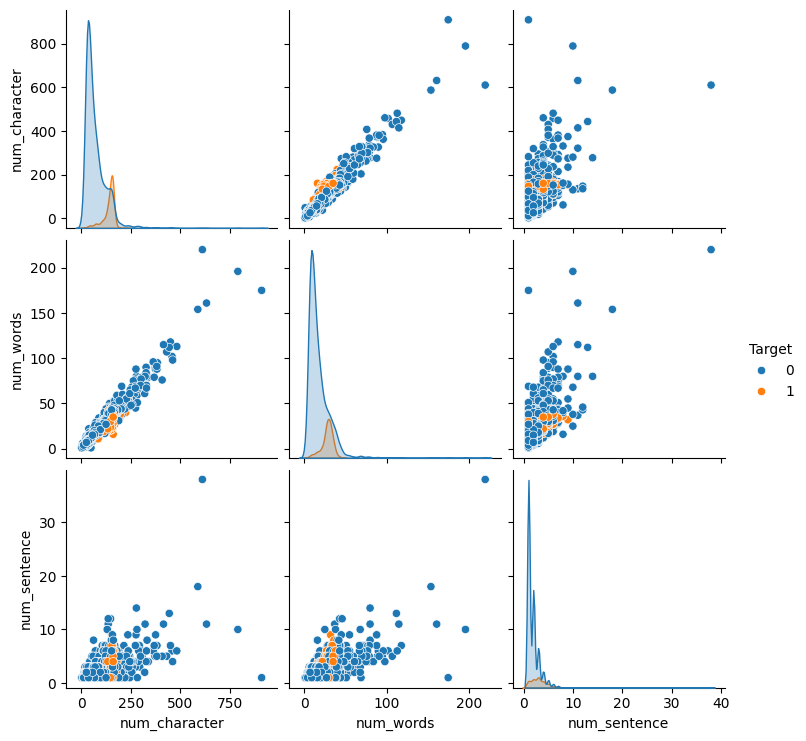

In [29]:
sns.pairplot(df , hue = 'Target')
plt.show()

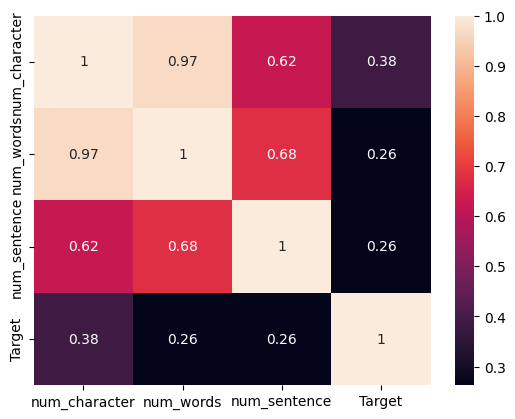

In [30]:
# check correlation

sns.heatmap(df[['num_character' , 'num_words' , 'num_sentence' , 'Target']].corr() , annot = True)
plt.show()

### 3. Data preprocessing

    Lower case
    Tokenization
    Removing special character
    Removing stop words and punctation
    Stemming



In [25]:
import nltk 

nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\vikas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vikas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

pr = PorterStemmer()

In [27]:
def transform_text(text : str):


    # convert into lower case
    text = text.lower()

    # convert into tokens
    text = nltk.word_tokenize(text)

    # remove special character

    list1 = []
    
    for i in text:

        if(i.isalnum()):

            list1.append(i) # append into list the alpha num chracter


    #  Removing stop words and punctation
    text = list1[:]
    list1.clear()

    for i in text:

        if i not in stopwords.words('english') and i not in string.punctuation:

            list1.append(i)

    # Stemming

    text = list1[:]
    list1.clear()

    for i in text:

        list1.append(pr.stem(i))



    return ' '.join(list1)

In [28]:
transform_text('I loved the YT lectures on Machine Learning .  How about you ')

'love yt lectur machin learn'

In [29]:
# apply on text

df['transformed_text'] = df['text'].apply(transform_text)



In [30]:
df.head()

,Target,text,num_character,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [31]:
from wordcloud import WordCloud

wc = WordCloud(width = 500 , height= 500 , min_font_size= 10 , background_color= 'white')

In [32]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep = ' '))

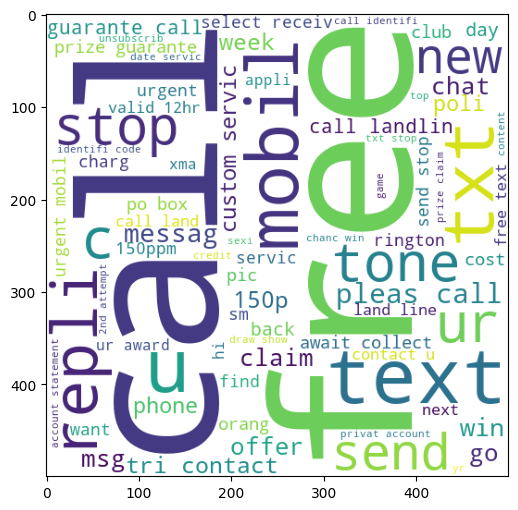

In [39]:
plt.figure(figsize= (15 , 6))
plt.imshow(spam_wc)
plt.show()

In [40]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep = ''))

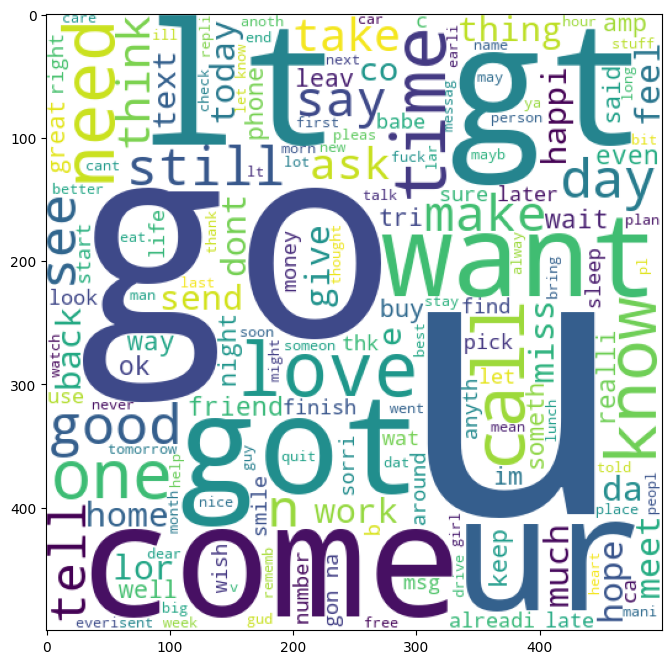

In [41]:
plt.figure(figsize= (10 , 8))
plt.imshow(ham_wc)
plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Target            5169 non-null   int64 
 1   text              5169 non-null   object
 2   num_character     5169 non-null   int64 
 3   num_words         5169 non-null   int64 
 4   num_sentence      5169 non-null   int64 
 5   transformed_text  5169 non-null   object
dtypes: int64(4), object(2)
memory usage: 282.7+ KB


find out most frequent word in data

In [33]:
# find out most frequent word in spam

spam_corpus = []

for msg in df[df['Target'] == 1]['transformed_text'].tolist():

    for word in msg.split():

        spam_corpus.append(word)

In [34]:
len(spam_corpus)

9939

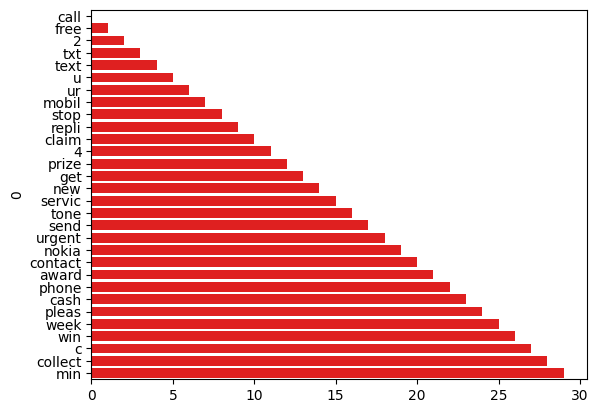

In [35]:
from collections import Counter

sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0] , color = 'red')
plt.show()

In [36]:
# find out most frequent word in ham
ham_corpus = []

for msg in df[df['Target'] == 0]['transformed_text'].tolist():

    for word in msg.split():

        ham_corpus.append(word)

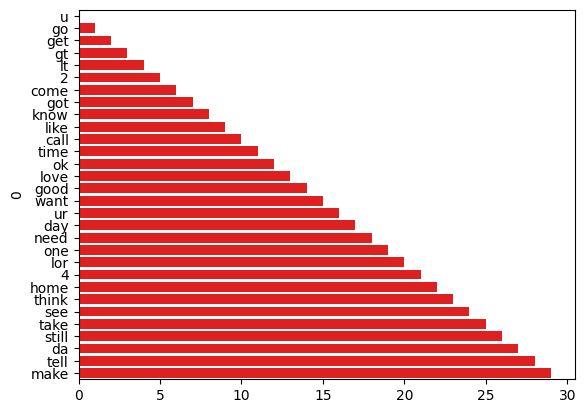

In [37]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0] , color = 'red')
plt.xticks()
plt.show()

In [38]:
cv = CountVectorizer()

tfidf = TfidfVectorizer()

In [39]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [40]:
x.shape

(5169, 6708)

In [41]:
y = df['Target'].values

In [42]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.2 , random_state= 42)

print(x_train.shape  , x_test.shape)


(4135, 6708) (1034, 6708)


In [43]:
gnb = GaussianNB()

mnb = MultinomialNB()

bnb = BernoulliNB()

In [44]:
gnb.fit(x_train , y_train)

y_pred1 = gnb.predict(x_test)

print('Accuracy score : ' , accuracy_score(y_test , y_pred1))
print('Confustion matrix : \n' , confusion_matrix(y_test , y_pred1))
print('\nPrecision : ' , precision_score(y_test , y_pred1))

Accuracy score :  0.8636363636363636
Confustion matrix : 
 [[772 117]
 [ 24 121]]

Precision :  0.5084033613445378


In [45]:
mnb.fit(x_train , y_train)

y_pred2 = mnb.predict(x_test)

print('Accuracy score : ' , accuracy_score(y_test , y_pred2))
print('Confustion matrix : \n' , confusion_matrix(y_test , y_pred2))
print('\nPrecision : ' , precision_score(y_test , y_pred2))

Accuracy score :  0.9613152804642167
Confustion matrix : 
 [[888   1]
 [ 39 106]]

Precision :  0.9906542056074766


In [46]:
bnb.fit(x_train , y_train)

y_pred3 = bnb.predict(x_test)

print('Accuracy score : ' , accuracy_score(y_test , y_pred3))
print('Confustion matrix : \n' , confusion_matrix(y_test , y_pred3))
print('\nPrecision : ' , precision_score(y_test , y_pred3))

Accuracy score :  0.9661508704061895
Confustion matrix : 
 [[885   4]
 [ 31 114]]

Precision :  0.9661016949152542


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [48]:
dt = DecisionTreeClassifier(max_depth= 5)
lr = LogisticRegression(solver= 'liblinear' , penalty= 'l1')
rf = RandomForestClassifier(n_estimators= 50 , random_state= 2)
svc = SVC(kernel= 'sigmoid' , gamma= 1.0)

In [49]:
clf = {

    'SVC': svc,
    'DT': dt,
    'LR' : lr,
    'RF': rf
}

In [50]:
def train_classfier(name , model , x_train , y_train , x_test , y_test):

    model.fit(x_train , y_train)

    y_pred2 = model.predict(x_test)

    accuracy = accuracy_score(y_test , y_pred2)
    matrix = confusion_matrix(y_test , y_pred2)
    precision = precision_score(y_test , y_pred2)

    
    print(name)
    print('Accuracy score : ' , accuracy)
    print('Precision : ' , precision)
    print('Confusion_matri : ' , matrix)

    return accuracy , precision 

In [51]:
accuracy_scores = []
precision_scores = []

for name , model in clf.items():

    accuracy , precision = train_classfier( name , model , x_train , y_train , x_test , y_test)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)



SVC
Accuracy score :  0.971953578336557
Precision :  0.9393939393939394
Confusion_matri :  [[881   8]
 [ 21 124]]
DT
Accuracy score :  0.9342359767891683
Precision :  0.8130081300813008
Confusion_matri :  [[866  23]
 [ 45 100]]
LR
Accuracy score :  0.9439071566731141
Precision :  0.865546218487395
Confusion_matri :  [[873  16]
 [ 42 103]]
RF
Accuracy score :  0.9700193423597679
Precision :  0.9913793103448276
Confusion_matri :  [[888   1]
 [ 30 115]]


In [52]:
df = pd.DataFrame()

df['algorithm'] = pd.DataFrame(clf.keys())
df['accuracy'] = pd.DataFrame(accuracy_scores)
df['precision'] = pd.DataFrame(precision_scores)

In [53]:
df.sort_values('precision' , ascending= False)

,algorithm,accuracy,precision
3,RF,0.970019,0.991379
0,SVC,0.971954,0.939394
2,LR,0.943907,0.865546
1,DT,0.934236,0.813008


In [54]:
import pickle

pickle.dump(tfidf , open('vectorizer.pkl' , 'wb'))
pickle.dump(rf , open('model.pkl' , 'wb'))